In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = 100

In [11]:
data = pd.read_excel(r'D:\DS\Data\Bank customer segmentation.xlsx')

In [12]:
data.shape

(12043, 23)

In [13]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [15]:
data.describe(include ='all')

<ipython-input-15-9f1be1d267fb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include ='all')


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,12043.000000,12043,12043,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,NaN,91,2,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,NaN,2018-09-28 00:00:00,M,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,9b50f359275c457d82c06125f0472f6e,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,NaN,174,6285,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,14704.195553,NaN,NaN,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,31503.722652,NaN,NaN,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.240000,NaN,NaN,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3158.585000,NaN,NaN,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


To get how many accounts are there for a single customer_id as as single customer may have mulitple as such FD, Loan etc.,

https://realpython.com/pandas-groupby/

In [16]:
#n_by_state_gender = df.groupby(["state", "gender"])["last_name"].count()

data2 = data.groupby(['customer_id'], as_index=False)['account'].count()  #give as_index =False for getting the grougp by result as a dataframe

In [17]:
type(data2)

pandas.core.frame.DataFrame

In [18]:
data2.head(100)

,customer_id,account
0,CUS-1005756958,73
1,CUS-1117979751,100
2,CUS-1140341822,80
3,CUS-1147642491,118
4,CUS-1196156254,245
...,...,...
95,CUS-72755508,58
96,CUS-809013380,124
97,CUS-860700529,233
98,CUS-880898248,78


<AxesSubplot:>

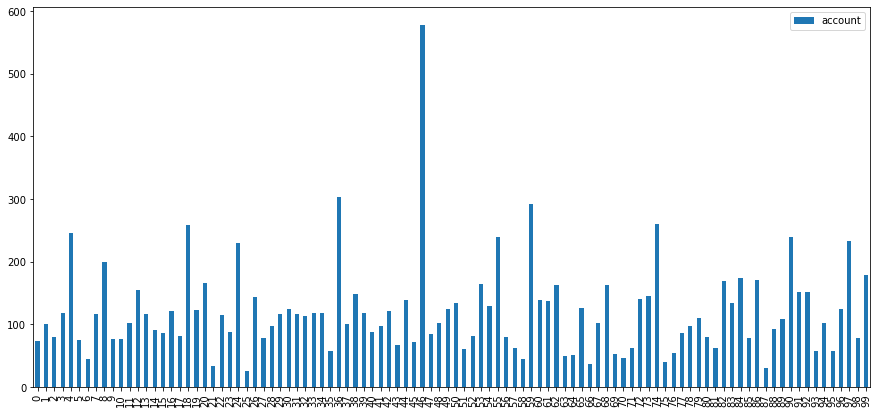

In [19]:
data2.plot.bar(figsize=(15, 7))

In [20]:
data3 = data.groupby(['customer_id', 'account',], as_index=False)['txn_description'].count()

In [21]:
data3

,customer_id,account,txn_description
0,CUS-1005756958,ACC-2828321672,73
1,CUS-1117979751,ACC-4065652575,100
2,CUS-1140341822,ACC-80388494,80
3,CUS-1147642491,ACC-3233697971,118
4,CUS-1196156254,ACC-3485804958,245
...,...,...,...
95,CUS-72755508,ACC-53508546,58
96,CUS-809013380,ACC-1990648130,124
97,CUS-860700529,ACC-1903037542,233
98,CUS-880898248,ACC-2970114956,78


In [22]:
data4 = data.groupby(['customer_id', 'txn_description',], as_index=False)['amount'].mean()

In [23]:
data5 = data.groupby(['customer_id', 'txn_description',], as_index=False)['amount'].sum()

Text(0.5, 1.0, 'customer_id vs total amount')

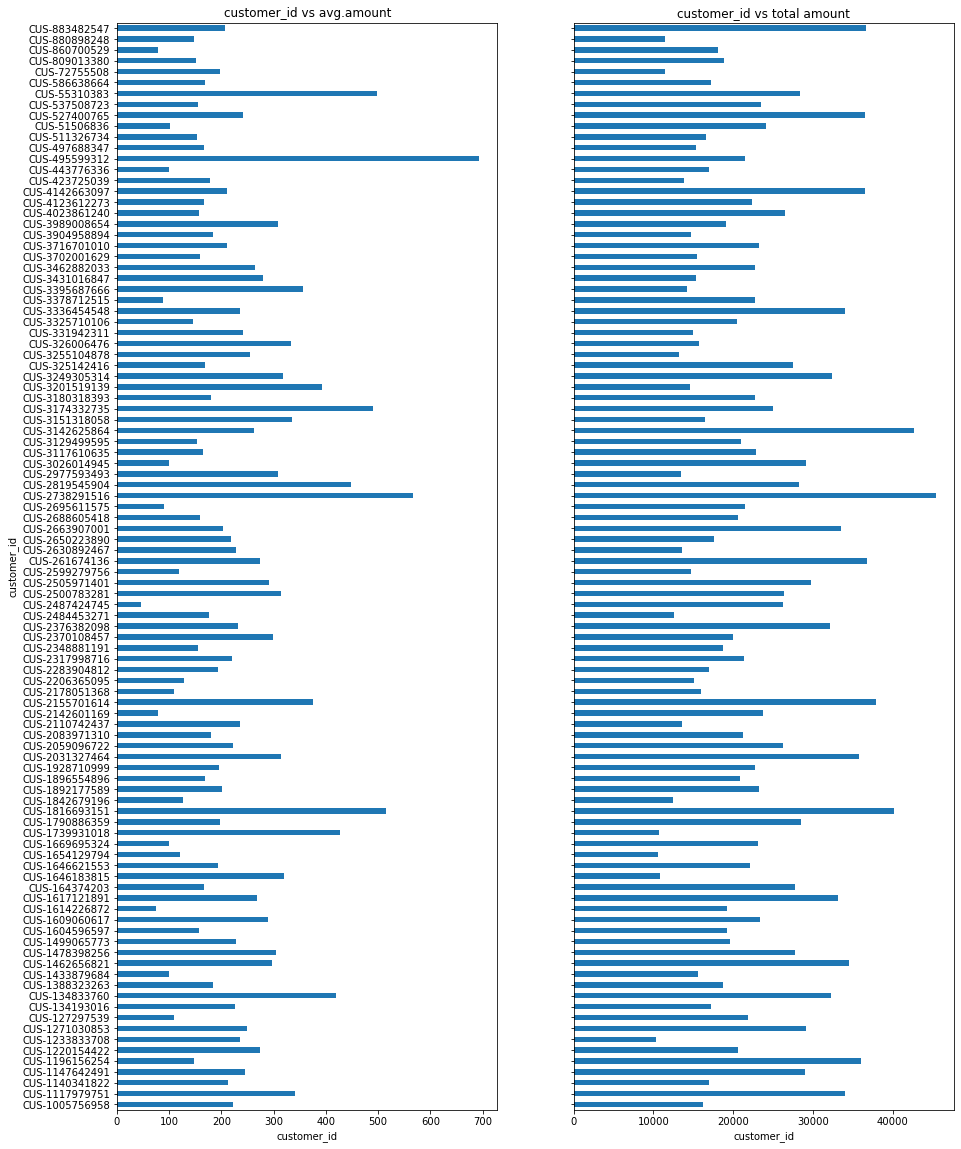

In [24]:
fig, ax = plt.subplots(1,2,sharey=True)
data.groupby(['customer_id'])['amount'].mean().plot(kind='barh',figsize=(15, 20),ax=ax[0])
ax[0].set_xlabel('customer_id')
ax[0].set_title('customer_id vs avg.amount')

data.groupby(['customer_id'])['amount'].sum().plot(kind='barh',figsize=(15, 20),ax=ax[1])
ax[1].set_xlabel('customer_id')
ax[1].set_title('customer_id vs total amount')

Text(0.5, 0.98, 'customer_id vs amount')

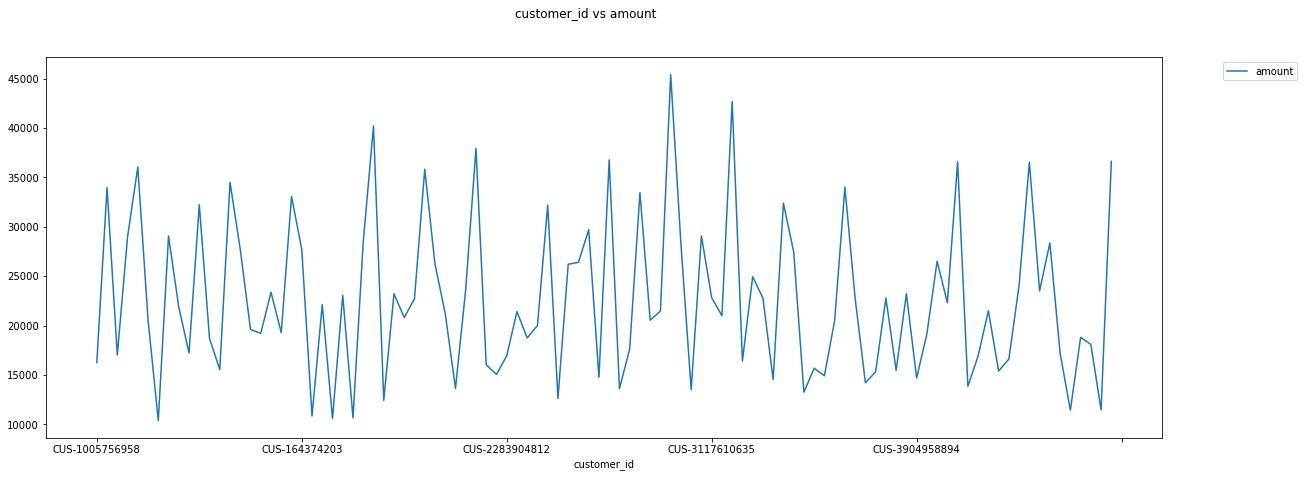

In [25]:
data_a = data.groupby(['customer_id'])['amount'].sum()
data_a.plot(figsize=(20,7))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('customer_id vs amount')

In [26]:
data['txn_description'].count()

12043

Text(0.5, 1.0, 'account vs txn_description')

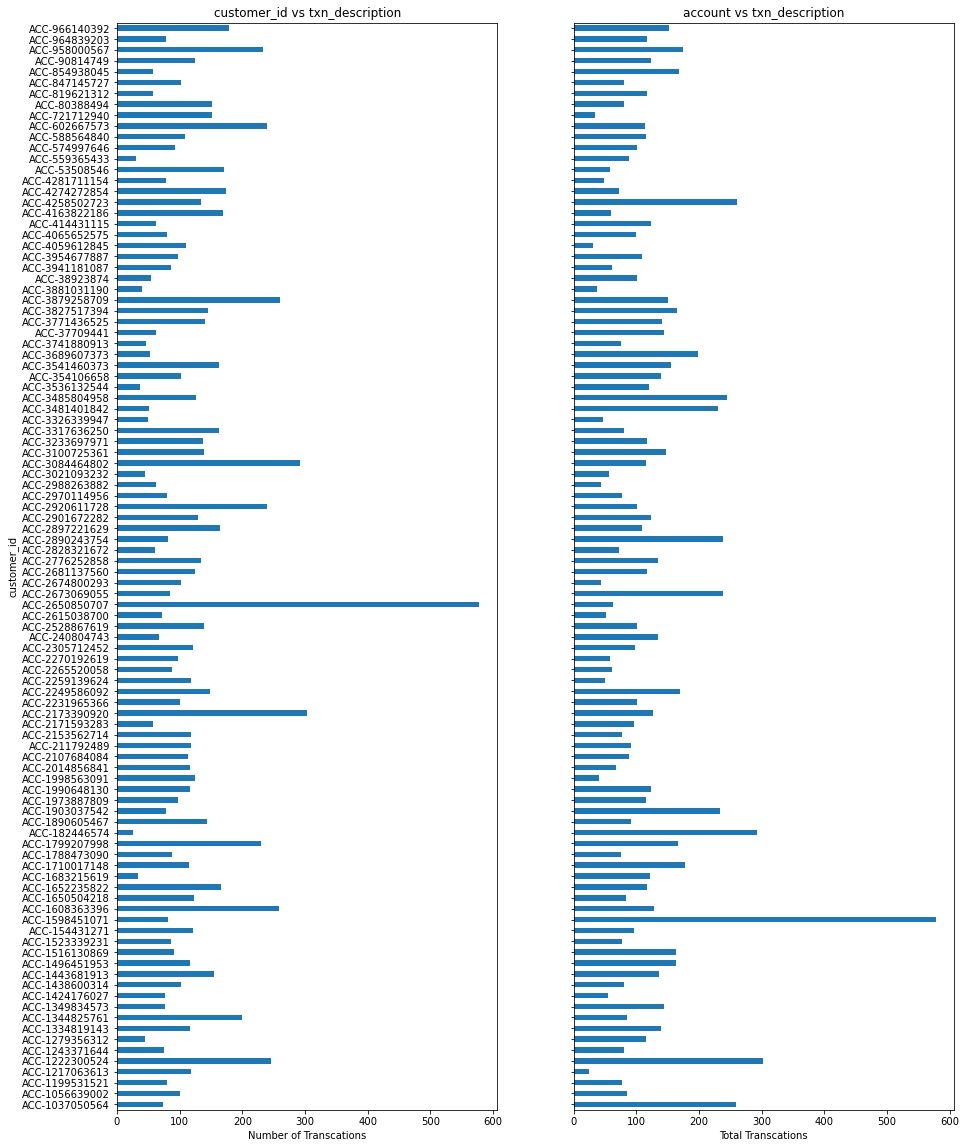

In [27]:
fig, ax = plt.subplots(1,2,sharey=True)
data.groupby(['customer_id'])['txn_description'].count().plot(kind='barh',figsize=(15,20),ax=ax[0])
ax[0].set_xlabel('Number of Transcations')
ax[0].set_title('customer_id vs txn_description')

data.groupby(['account'])['txn_description'].count().plot(kind='barh',figsize=(15, 20),ax=ax[1])
ax[1].set_xlabel('Total Transcations')
ax[1].set_title('account vs txn_description')

In [28]:
data.groupby('txn_description')

In [29]:
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [30]:
data[data['txn_description'] == 'INTER BANK']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,4438.16,2018-08-01,M,23,NaN,NaN,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit
14,posted,NaN,NaN,ACC-1496451953,AUD,145.16 -37.84,INTER BANK,NaN,NaN,Ricky,173.66,2018-08-01,M,43,NaN,NaN,2018-08-01T07:00:00.000+0000,39.0,243dcea5fb1846ffb89671edf45f157d,Australia,CUS-3142625864,NaN,debit
16,posted,NaN,NaN,ACC-2014856841,AUD,144.99 -37.90,INTER BANK,NaN,NaN,Patrick,260514.83,2018-08-01,M,46,NaN,NaN,2018-08-01T08:00:00.000+0000,22.0,ae8124d2e33547bdb605d9a51581457f,Australia,CUS-2370108457,NaN,debit
25,posted,NaN,NaN,ACC-354106658,AUD,151.04 -33.80,INTER BANK,NaN,NaN,Christine,4474.38,2018-08-01,F,39,NaN,NaN,2018-08-01T09:00:00.000+0000,25.0,f8cbe52460864f5fa77728f4a9e08997,Australia,CUS-2376382098,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11938,posted,NaN,NaN,ACC-1799207998,AUD,150.68 -33.79,INTER BANK,NaN,NaN,Susan,10094.03,2018-10-31,F,20,NaN,NaN,2018-10-31T10:00:00.000+0000,39.0,e979fe6f77404adfb0d71abe4819bddb,Australia,CUS-164374203,NaN,debit
11963,posted,NaN,NaN,ACC-182446574,AUD,116.06 -32.00,INTER BANK,NaN,NaN,Tonya,10953.17,2018-10-31,F,27,NaN,NaN,2018-10-31T12:00:00.000+0000,57.0,9581e449fc0e42eba678b84e6818d4c8,Australia,CUS-3026014945,NaN,debit
11969,posted,NaN,NaN,ACC-3100725361,AUD,145.73 -17.03,INTER BANK,NaN,NaN,Ronald,10530.89,2018-10-31,M,25,NaN,NaN,2018-10-31T13:00:00.000+0000,26.0,dd8314056cce459596226942ac33bf79,Australia,CUS-2178051368,NaN,debit
12022,posted,NaN,NaN,ACC-182446574,AUD,116.06 -32.00,INTER BANK,NaN,NaN,Tonya,10920.17,2018-10-31,F,27,NaN,NaN,2018-10-31T20:00:00.000+0000,33.0,2ecd88fa9fd34a33937ac860e320df7a,Australia,CUS-3026014945,NaN,debit


In [31]:
#subset_df = df[(df["A"] >= 1) & (df["B"] < 5)]

data[(data['txn_description'] == 'INTER BANK') & (data['card_present_flag'] == 1.0)] 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [32]:
data[(data['txn_description'] == 'PAY/SALARY') & (data['card_present_flag'] == 1.0)] 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [33]:
data[(data['txn_description'] == 'PHONE BANK') & (data['card_present_flag'] == 1.0)] 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [34]:
#data[(data['PHONE BANK']) & (data['card_present_flag'] == 1.0)]

we see that INTER BANK, PHONE BANK, PAY/SALARY   there are no row  where card_present_flag is 1.0

The above percentiles are referred to a boxplot whcih says the 25% of the data are less tha that specific value

### We see txn_description plays an important role we can see transactions as transcations wise i.e transactions of 5 types

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101

In [35]:
list =[ 'SALES-POS', 'POS','PAYMENT','PAY/SALARY', 'INTER BANK',  'PHONE BANK']

In [36]:
for i in list:
    data[i] = data['txn_description'] == i
    

In [37]:
#data['SALES-POS']  = data['txn_description'] == 'SALES-POS'   #sample

In [38]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,SALES-POS,POS,PAYMENT,PAY/SALARY,INTER BANK,PHONE BANK
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,False,True,False,False,False,False
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,True,False,False,False,False,False
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,False,True,False,False,False,False
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,True,False,False,False,False,False
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,True,False,False,False,False,False


In [39]:
data['SALES-POS'].value_counts()

False    8109
True     3934
Name: SALES-POS, dtype: int64

In [40]:
"""def EDA(Bankdata):
    data.info()
    #print(f" The information of the dataset is + {information}" )
    
    
    nullcount = data.isnull().sum()
    print("\n")
    print(f" The null count is \n \n {nullcount}")
    return 0
_=EDA(data)   """ 

'def EDA(Bankdata):\n    data.info()\n    #print(f" The information of the dataset is + {information}" )\n    \n    \n    nullcount = data.isnull().sum()\n    print("\n")\n    print(f" The null count is \n \n {nullcount}")\n    return 0\n_=EDA(data)   '

In [41]:
data['age'] = pd.to_numeric(data['age'])

###  check each and every column 

<h3 style ="color:red;"> Univariate Analysis </h3>


In [42]:
data['status'].unique()

array(['authorized', 'posted'], dtype=object)

In [43]:
data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [44]:
data['status'].isnull().sum()

0

<AxesSubplot:>

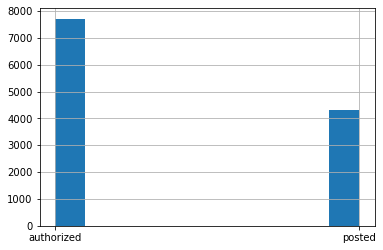

In [45]:
data['status'].hist() #y- axis shows the frequency

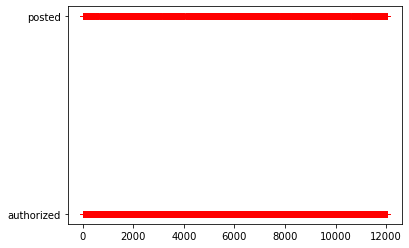

In [46]:
plt.plot(data.status,'r+' )

In [47]:
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

<AxesSubplot:>

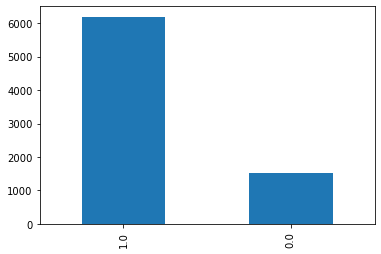

In [48]:
data['card_present_flag'].value_counts().plot.bar()

In [49]:
data['card_present_flag'].isnull().sum()

4326

card_present_flag has some missing values, we can impute them

In [50]:
data['bpay_biller_code'].unique()

array([nan, 0, ' THE DISCOUNT CHEMIST GROUP',
       ' LAND WATER & PLANNING East Melbourne'], dtype=object)

In [51]:
data['bpay_biller_code'].value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

<AxesSubplot:>

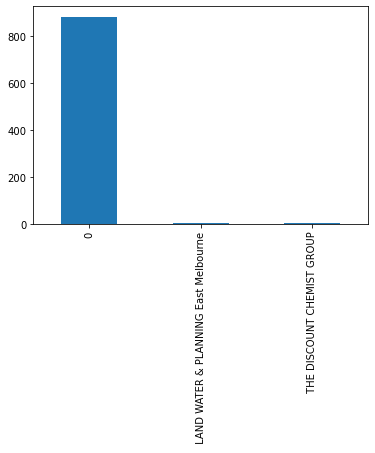

In [52]:
data['bpay_biller_code'].value_counts().plot.bar()

bpay_biller_code has three categories and has too many missing values heence we can drop this column

In [53]:
data['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

account columns has unique values, doesn't show pattern. Hence we can drop this colum too.

In [54]:
data['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

this column is single valued column, hence we can drop off the column

In [55]:
data['balance'].value_counts()

1204.08    2
2786.80    2
2773.11    2
4007.96    2
834.47     2
          ..
6112.31    1
7215.07    1
4010.02    1
2005.82    1
0.25       1
Name: balance, Length: 12006, dtype: int64

In [56]:
data.balance.max()

267128.52

In [57]:
data.balance.min()

0.24

<AxesSubplot:>

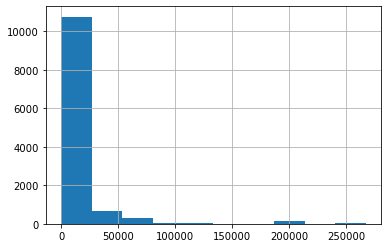

In [58]:
data['balance'].hist(bins = 10)

balnce column has some outliers, let see the how much data lies with in 1,00,000

###ACCORFIND TO BOX PLOT IF WE SAY 25% OF THE DATA  LIES BELOW THE FIRST LINE AND 75% OF THE DATA LIES BELOW THE 75% LINE THEN HERE IT SELF 100% DATA HAPPENED. THEN WHAT ABOUT THE ABOVE DATA 100 ++% DATA OR WHAT :)
    

75 % OF THE DATA LIES BELOW THE LINE MEANS 75%  ABIVE ABOVE 25 % DATA. DONT INCLUDE 75% DATA WITH 25%DATA

<AxesSubplot:>

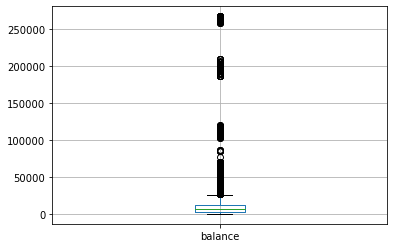

In [59]:
data.boxplot(column='balance')

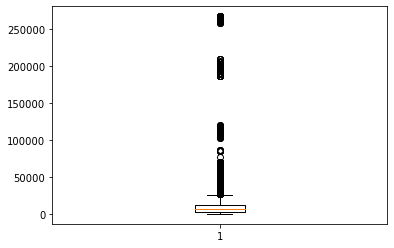

In [60]:
plt.boxplot(data['balance'])
plt.show()

In [61]:
perc =[.25,.80,.90,.99,.75] 
data.balance.describe(percentiles=perc)

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
80%       15638.020000
90%       29442.384000
99%      201963.445200
max      267128.520000
Name: balance, dtype: float64

In [62]:
data['long_lat'].value_counts()

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

In [63]:
# new data frame with split value columns 
co_ordinates = data["long_lat"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["longitude"]= co_ordinates[0] 
  
# making separate last name column from new data frame 
data["latitude"]= co_ordinates[1] 

In [64]:
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

In [65]:
"""from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
sites_lat_y = data['latitude'].tolist()
sites_lon_x = data['longitude'].tolist()
m.scatter(sites_lon_x,sites_lat_y,latlon=True)
plt.title('Basemap', fontsize=20)
plt.show()"""

"from mpl_toolkits.basemap import Basemap\nfig = plt.figure(figsize=(12,9))\nm = Basemap(projection='mill',\n           llcrnrlat = -90,\n           urcrnrlat = 90,\n           llcrnrlon = -180,\n           urcrnrlon = 180,\n           resolution = 'c')\nm.drawcoastlines()\nm.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])\nm.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])\nsites_lat_y = data['latitude'].tolist()\nsites_lon_x = data['longitude'].tolist()\nm.scatter(sites_lon_x,sites_lat_y,latlon=True)\nplt.title('Basemap', fontsize=20)\nplt.show()"

we can drop the above column as it is unique valued cloumn

In [66]:
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

<AxesSubplot:>

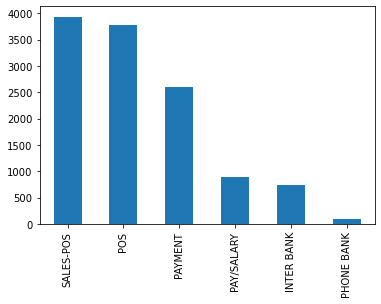

In [67]:
data['txn_description'].value_counts().plot.bar()

In [68]:
data['merchant_id']

0        81c48296-73be-44a7-befa-d053f48ce7cd
1        830a451c-316e-4a6a-bf25-e37caedca49e
2        835c231d-8cdf-4e96-859d-e9d571760cf0
3        48514682-c78a-4a88-b0da-2d6302e64673
4        b4e02c10-0852-4273-b8fd-7b3395e32eb0
                         ...                 
12038    32aa73dc-b7c2-4161-b14d-6271b96ce792
12039    296a0500-8552-48ac-ac81-ec37065b568e
12040    e5975ab4-08f7-4725-a369-24cc0e35ed6e
12041    af49051a-591d-4b08-bd3c-27730b70ed37
12042    f31f4b14-2040-40ec-a120-b141bb274cbd
Name: merchant_id, Length: 12043, dtype: object

drop this column as the data is rubbish

In [69]:
data['merchant_code']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12038   NaN
12039   NaN
12040   NaN
12041   NaN
12042   NaN
Name: merchant_code, Length: 12043, dtype: float64

too many null values

In [70]:
data['first_name'].value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

what would be the use of this column -->first_name

In [71]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [72]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

In [73]:
data.year.value_counts()

2018    12043
Name: year, dtype: int64

since we have all the transactions in year 2018, it's obvious to remove this column

In [74]:
#df.drop(['date','year'],axis=1,inplace=True)

In [75]:
data.month.value_counts()

10    4087
9     4013
8     3943
Name: month, dtype: int64

Text(0.5, 0.98, 'month vs amount')

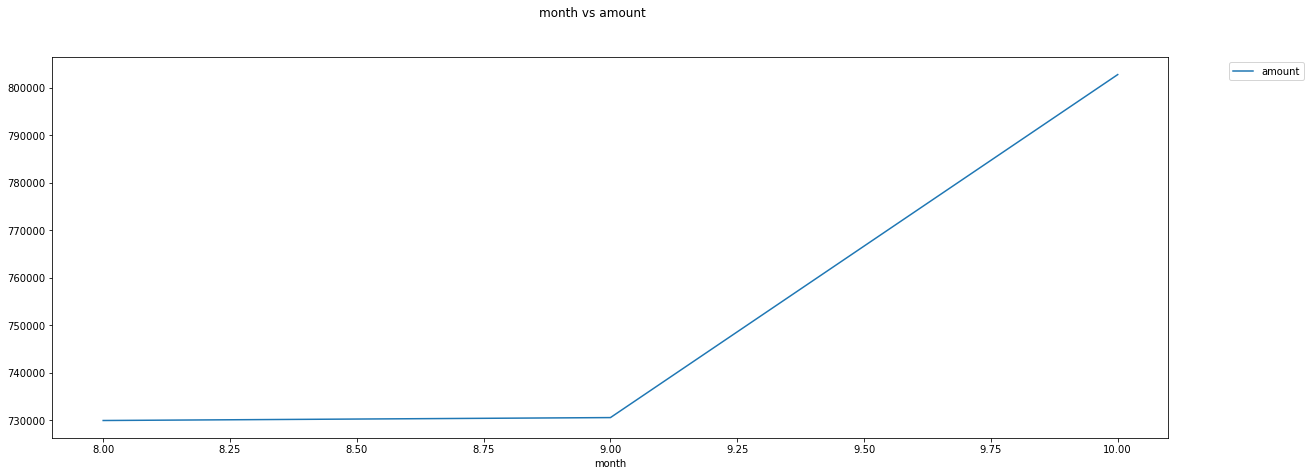

In [76]:
data_a = data.groupby(['month'])['amount'].sum()
data_a.plot(figsize=(20,7))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('month vs amount')


In [77]:
data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

(array([3341., 3131., 1874., 2151., 1128.,  194.,    0.,   88.,  102.,
          34.]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <BarContainer object of 10 artists>)

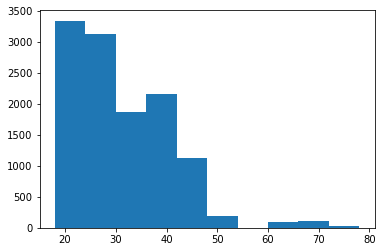

In [78]:
plt.hist(data.age)

In [79]:
data['merchant_suburb'].nunique()

1609

In [80]:
data['merchant_suburb'].isnull().sum()

4326

In [81]:
data['merchant_suburb'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Ashmore
1               Sydney
2               Sydney
3              Buderim
4        Mermaid Beach
             ...      
12038         Ringwood
12039           Casula
12040       Kings Park
12041         Oakleigh
12042           Mascot
Name: merchant_suburb, Length: 12043, dtype: object>

In [82]:
data['merchant_suburb'].nunique()

1609

<AxesSubplot:>

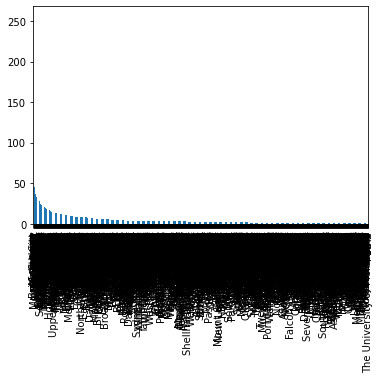

In [83]:
data['merchant_suburb'].value_counts().plot.bar()

In [84]:
data['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

<AxesSubplot:>

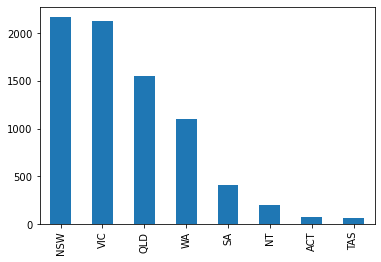

In [85]:
data['merchant_state'].value_counts().plot.bar()

In [86]:
data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [87]:
data['gender'].isnull().sum()

0

<AxesSubplot:>

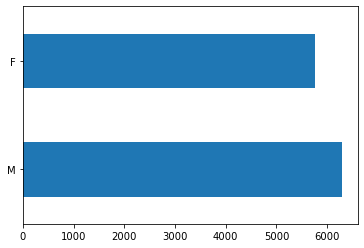

In [88]:
data['gender'].value_counts().plot.barh()

looks fine

In [89]:
data['extraction'].value_counts()

2018-09-03T11:00:00.000+0000    10
2018-10-01T11:00:00.000+0000     9
2018-08-28T17:00:00.000+0000     9
2018-10-19T13:00:00.000+0000     9
2018-08-07T17:00:00.000+0000     9
                                ..
2018-10-30T15:00:00.000+0000     1
2018-10-02T14:19:46.000+0000     1
2018-10-27T20:55:10.000+0000     1
2018-10-03T11:30:07.000+0000     1
2018-09-20T17:42:53.000+0000     1
Name: extraction, Length: 9442, dtype: int64

In [90]:
data['transaction_id'].value_counts()

9b50f359275c457d82c06125f0472f6e    1
2e3b485aa4754a6a94f5e79fdb2ae58c    1
0c934978824040bc81bcb5a4cf4876cf    1
0a9e686a341c41f98e4b57d01a9bfbb4    1
8fdf05b38ce441f697681650e70c9459    1
                                   ..
2e499ff1d74946cb9a693dd1ff06857c    1
2965a807b20c4e4fb253251c7f4658c6    1
04932da035ab4b56a373e85d0cd566be    1
bbc7c12824114ffa8e1161e5418032c1    1
9052d6d4a2d4417ebe575ac170fa820b    1
Name: transaction_id, Length: 12043, dtype: int64

In [91]:
#plt.plot(data.transaction_id, 'r+')

<AxesSubplot:>

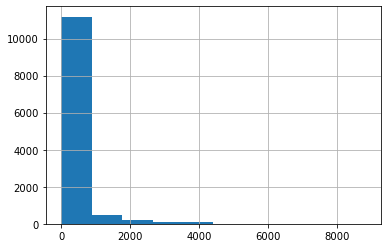

In [92]:
data['amount'].hist()

<AxesSubplot:>

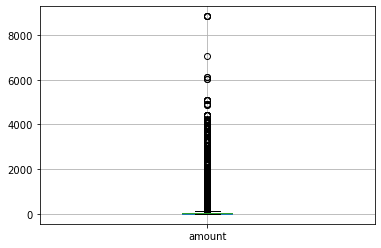

In [93]:
data.boxplot(column = 'amount')

<AxesSubplot:>

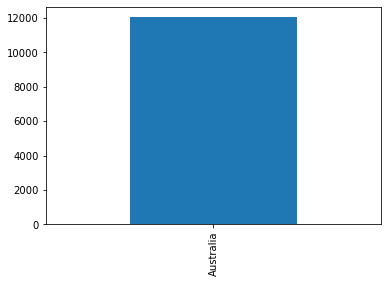

In [94]:
data['country'].value_counts().plot.bar()

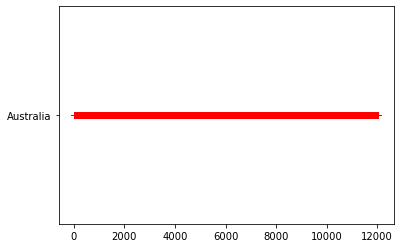

In [95]:
plt.plot(data.country, 'r+')

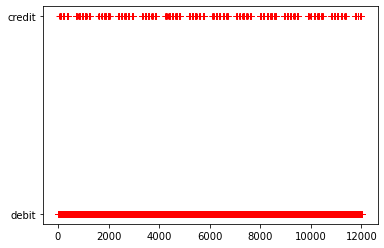

In [96]:
plt.plot(data.movement, 'r+')

<AxesSubplot:>

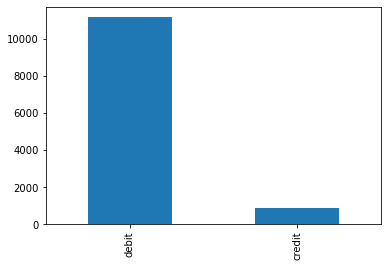

In [97]:
data['movement'].value_counts().plot.bar()

### NULL VALUE TREATMENT

### NULL VALUE TREATMENT

In [98]:
data['card_present_flag'] = data['card_present_flag'].fillna(1.0)

In [99]:
data['card_present_flag'].isnull().sum()

0

you should perform oversampling for a small dataset.

<AxesSubplot:>

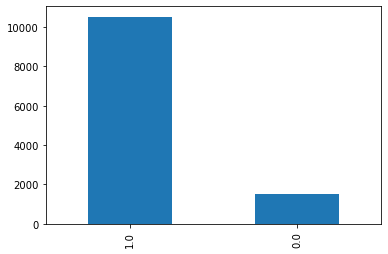

In [100]:
data['card_present_flag'].value_counts().plot.bar()

dropped the columns which i felt as no use

In [101]:
ev = ['bpay_biller_code', 'txn_description', 'country', 'merchant_long_lat', 'merchant_code','merchant_suburb','transaction_id','merchant_id','extraction','currency','date','year','longitude','latitude']

data = data.drop(ev, axis =1)

In [102]:
data.head()

,status,card_present_flag,account,long_lat,first_name,balance,gender,age,merchant_state,amount,customer_id,movement,SALES-POS,POS,PAYMENT,PAY/SALARY,INTER BANK,PHONE BANK,month
0,authorized,1.0,ACC-1598451071,153.41 -27.95,Diana,35.39,F,26,QLD,16.25,CUS-2487424745,debit,False,True,False,False,False,False,8
1,authorized,0.0,ACC-1598451071,153.41 -27.95,Diana,21.20,F,26,NSW,14.19,CUS-2487424745,debit,True,False,False,False,False,False,8
2,authorized,1.0,ACC-1222300524,151.23 -33.94,Michael,5.71,M,38,NSW,6.42,CUS-2142601169,debit,False,True,False,False,False,False,8
3,authorized,1.0,ACC-1037050564,153.10 -27.66,Rhonda,2117.22,F,40,QLD,40.90,CUS-1614226872,debit,True,False,False,False,False,False,8
4,authorized,1.0,ACC-1598451071,153.41 -27.95,Diana,17.95,F,26,QLD,3.25,CUS-2487424745,debit,True,False,False,False,False,False,8


In [103]:
data['SALES-POS'].value_counts()

False    8109
True     3934
Name: SALES-POS, dtype: int64

In [104]:
"""df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df
ax = df.plot.bar(x='lab', y='val', rot=0)"""

"df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})\ndf\nax = df.plot.bar(x='lab', y='val', rot=0)"

In [105]:
#we can't replace the null values in merchant_id beacuse it has different randomly generated numbers

### Bi-Variate Analysis

No handles with labels found to put in legend.


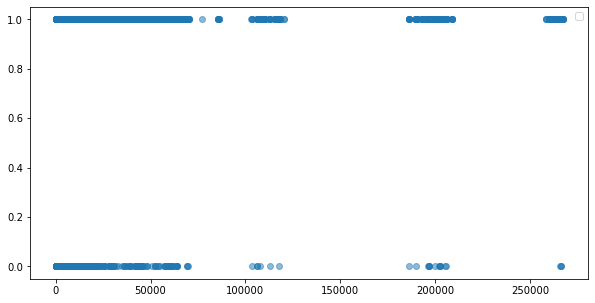

In [106]:
x=data['balance']
y=data['card_present_flag']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()

No handles with labels found to put in legend.


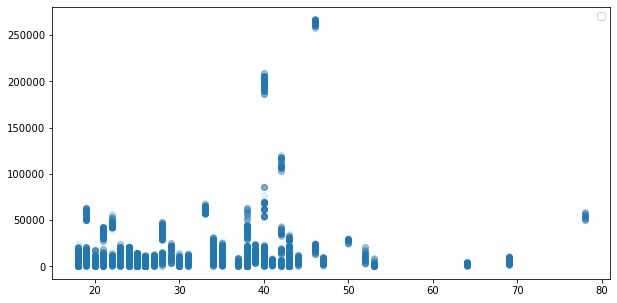

In [107]:
x=data['age']
y=data['balance']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.1)
plt.legend(loc=1)
plt.show()

No handles with labels found to put in legend.


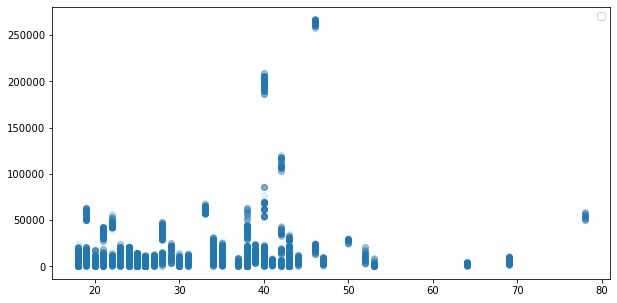

In [108]:
x=data['age']
y=data['balance']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.1)
plt.legend(loc=1)
plt.show()

In [109]:
#ax = df.plot.bar(x='lab', y='val', rot=0)
#data.groupby(['account'])('plot.bar(x = 'account', y = 'balance')
"""fig, ax = plt.subplots(1,2,sharey=True)
data.groupby(['account'])['balance'].plot(kind='barh',figsize=(15, 5),ax=ax[0])
ax[0].set_xlabel('balance')
ax[0].set_title('account vs balance')"""

"fig, ax = plt.subplots(1,2,sharey=True)\ndata.groupby(['account'])['balance'].plot(kind='barh',figsize=(15, 5),ax=ax[0])\nax[0].set_xlabel('balance')\nax[0].set_title('account vs balance')"

In [110]:
#data.abplot.bar(x = 'gender', y ='card_present_flag') this code does not work as we need numeric data to plot

### refer  - https://stackoverflow.com/questions/48238305/bar-plot-with-groupby

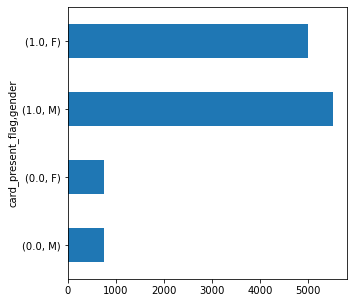

In [111]:
fig = plt.figure()
data.groupby(['card_present_flag'])['gender'].value_counts().plot(kind='barh',figsize=(5, 5))
plt.show()

In [112]:
data.groupby(['card_present_flag']).gender.value_counts()

card_present_flag  gender
0.0                M          763
                   F          760
1.0                M         5522
                   F         4998
Name: gender, dtype: int64

<Figure size 432x288 with 0 Axes>

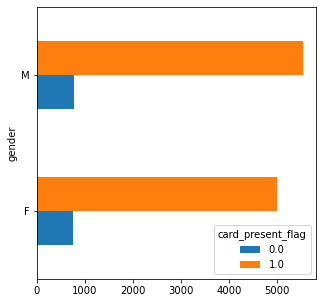

In [113]:
fig = plt.figure()
data.groupby(['card_present_flag']).gender.value_counts().unstack(0).plot(kind='barh',figsize=(5, 5))
plt.show()

In [114]:
gk = data.groupby(['gender'])

In [115]:
gk

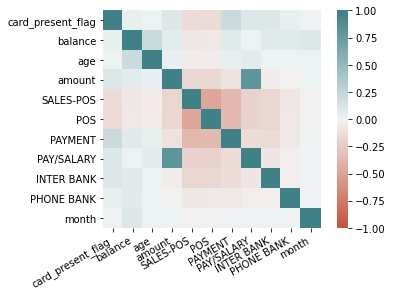

In [116]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [117]:
dummy1 = pd.get_dummies(data['gender'])
data =  pd.concat([dummy1, data], axis =1 )

In [118]:
dummy2 = pd.get_dummies(data['status'])
data =  pd.concat([dummy2, data], axis =1 )

In [119]:
dummy4 = pd.get_dummies(data['movement'])
data =  pd.concat([dummy4, data], axis =1 )


In [120]:
#dummy5 = pd.get_dummies(data['txn_description'])
#data =  pd.concat([dummy5, data], axis =1 )


In [121]:
dummy6 = pd.get_dummies(data['merchant_state'])
data =  pd.concat([dummy6, data], axis =1 )


In [122]:
data.head()

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,credit,debit,authorized,posted,F,M,status,card_present_flag,account,long_lat,first_name,balance,gender,age,merchant_state,amount,customer_id,movement,SALES-POS,POS,PAYMENT,PAY/SALARY,INTER BANK,PHONE BANK,month
0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,authorized,1.0,ACC-1598451071,153.41 -27.95,Diana,35.39,F,26,QLD,16.25,CUS-2487424745,debit,False,True,False,False,False,False,8
1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,authorized,0.0,ACC-1598451071,153.41 -27.95,Diana,21.20,F,26,NSW,14.19,CUS-2487424745,debit,True,False,False,False,False,False,8
2,0,1,0,0,0,0,0,0,0,1,1,0,0,1,authorized,1.0,ACC-1222300524,151.23 -33.94,Michael,5.71,M,38,NSW,6.42,CUS-2142601169,debit,False,True,False,False,False,False,8
3,0,0,0,1,0,0,0,0,0,1,1,0,1,0,authorized,1.0,ACC-1037050564,153.10 -27.66,Rhonda,2117.22,F,40,QLD,40.90,CUS-1614226872,debit,True,False,False,False,False,False,8
4,0,0,0,1,0,0,0,0,0,1,1,0,1,0,authorized,1.0,ACC-1598451071,153.41 -27.95,Diana,17.95,F,26,QLD,3.25,CUS-2487424745,debit,True,False,False,False,False,False,8


In [123]:
ev3  =['gender', 'status','long_lat','movement', ]

In [124]:
data = data.drop(ev3, axis =1)

In [125]:
ev4 = ['merchant_state']
data = data.drop(ev4, axis =1)

In [126]:
ev6  = ['first_name']
data= data.drop(ev6, axis =1)

In [127]:
ev7 = ['account', 'customer_id']
data= data.drop(ev7, axis =1)

In [128]:
data.isnull().sum()

ACT                  0
NSW                  0
NT                   0
QLD                  0
SA                   0
TAS                  0
VIC                  0
WA                   0
credit               0
debit                0
authorized           0
posted               0
F                    0
M                    0
card_present_flag    0
balance              0
age                  0
amount               0
SALES-POS            0
POS                  0
PAYMENT              0
PAY/SALARY           0
INTER BANK           0
PHONE BANK           0
month                0
dtype: int64

In [129]:
data.head(5)

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,credit,debit,authorized,posted,F,M,card_present_flag,balance,age,amount,SALES-POS,POS,PAYMENT,PAY/SALARY,INTER BANK,PHONE BANK,month
0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1.0,35.39,26,16.25,False,True,False,False,False,False,8
1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0.0,21.20,26,14.19,True,False,False,False,False,False,8
2,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1.0,5.71,38,6.42,False,True,False,False,False,False,8
3,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1.0,2117.22,40,40.90,True,False,False,False,False,False,8
4,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1.0,17.95,26,3.25,True,False,False,False,False,False,8


## Modelling

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [131]:
"""features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)"""

'features, true_labels = make_blobs(\n    n_samples=200,\n    centers=3,\n    cluster_std=2.75,\n    random_state=42\n)'

In [132]:
#features[:5]

In [133]:
#true_labels[:5]

In [134]:
scaler  = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [135]:
scaled_features = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)

In [136]:
scaled_features.head()

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,credit,debit,authorized,posted,F,M,card_present_flag,balance,age,amount,SALES-POS,POS,PAYMENT,PAY/SALARY,INTER BANK,PHONE BANK,month
0,-0.078093,-0.468687,-0.131595,2.596097,-0.188917,-0.075356,-0.463672,-0.31705,-0.281286,0.281286,0.748719,-0.748719,1.044761,-1.044761,0.380489,-0.465641,-0.456138,-0.289724,-0.696520,1.477651,-0.524725,-0.281286,-0.256238,-0.091965,-1.239419
1,-0.078093,2.133619,-0.131595,-0.385194,-0.188917,-0.075356,-0.463672,-0.31705,-0.281286,0.281286,0.748719,-0.748719,1.044761,-1.044761,-2.628197,-0.466091,-0.456138,-0.293201,1.435709,-0.676750,-0.524725,-0.281286,-0.256238,-0.091965,-1.239419
2,-0.078093,2.133619,-0.131595,-0.385194,-0.188917,-0.075356,-0.463672,-0.31705,-0.281286,0.281286,0.748719,-0.748719,-0.957157,0.957157,0.380489,-0.466583,0.738376,-0.306313,-0.696520,1.477651,-0.524725,-0.281286,-0.256238,-0.091965,-1.239419
3,-0.078093,-0.468687,-0.131595,2.596097,-0.188917,-0.075356,-0.463672,-0.31705,-0.281286,0.281286,0.748719,-0.748719,1.044761,-1.044761,0.380489,-0.399556,0.937462,-0.248126,1.435709,-0.676750,-0.524725,-0.281286,-0.256238,-0.091965,-1.239419
4,-0.078093,-0.468687,-0.131595,2.596097,-0.188917,-0.075356,-0.463672,-0.31705,-0.281286,0.281286,0.748719,-0.748719,1.044761,-1.044761,0.380489,-0.466194,-0.456138,-0.311663,1.435709,-0.676750,-0.524725,-0.281286,-0.256238,-0.091965,-1.239419


In [137]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

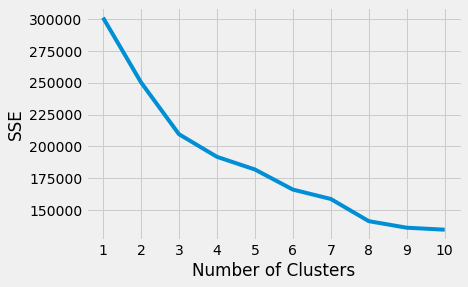

In [138]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

### Train - Test split

In [139]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


3

In [141]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=None
)

In [149]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [150]:
kmeans.inertia_

209630.6771411642

In [151]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.0780934 , -0.46868733, -0.13159451, -0.38519369, -0.18891722,
        -0.0753558 , -0.46367222, -0.31705028, -0.28128609,  0.28128609,
        -1.33561409,  1.33561409, -0.09836166,  0.09836166,  0.38048898,
         0.18904814,  0.0659775 , -0.18145655, -0.6965199 , -0.67674982,
         1.31066924, -0.28128609,  0.6400368 ,  0.22971195,  0.01488068],
       [-0.0780934 , -0.46868733, -0.13159451, -0.38182119, -0.18891722,
        -0.0753558 , -0.46367222, -0.31705028,  3.55075958, -3.55075958,
        -1.33325625,  1.33325625, -0.00601966,  0.00601966,  0.38048898,
         0.04833354,  0.20372729,  2.89694281, -0.6965199 , -0.67431271,
        -0.52472491,  3.55075958, -0.25623799, -0.09196491,  0.00752305],
       [ 0.04379344,  0.26283179,  0.07379593,  0.21562361,  0.10594152,
         0.04225824,  0.2600194 ,  0.17779634, -0.28128609,  0.28128609,
         0.74871926, -0.74871926,  0.04458017, -0.04458017, -0.21337167,
        -0.08989368, -0.05278065, -0.25092568,  0

In [152]:
# The number of iterations required to converge
kmeans.n_iter_

3

In [146]:
wcss = []

In [147]:
wcss.append(kmeans.inertia_)

In [153]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_features)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
fit.predict()